<a href="https://colab.research.google.com/github/LBncl/AmazonMLInterviewQuestion/blob/main/NAFLD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAFLD PROJECT

## Imports

In [1]:
# Imports
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Cleaning

In [2]:
# Read in data
df_raw = pd.read_excel('master_with_nordic_and_multiBM.xlsx')

# Check if dataFrame is empty
if df_raw.empty:
    print('DataFrame is empty!')

In [3]:
# Subset data frame
main_df = df_raw.filter(items=['CPH_EV_AGE_CALC', 'TBL.PATIENT.INFO..PI_BL_GENDER', 'CPH_EV_CI_BMI_CALC', 
                         'TBL.ALL.EVENTS..AE_SF_ALCO_XS', 'insulin_resistance', 'hypertensive', 'waist_to_hip_ratio',
                         'idf_metabolic_syndrome', 'eGFR', 'dyslipidaemia', 'fibroscan_stiffness_reliable',
                         'TBL.ALL.EVENTS..AE_BR_ALT_iuL',
                         'TBL.ALL.EVENTS..AE_BR_AST_iuL', 'TBL.ALL.EVENTS..AE_BR_GGT_iuL',
                         'TBL.ALL.EVENTS..AE_BR_FERR_ugL',
                         'TBL.ALL.EVENTS..AE_BR_PLT_109L', 'TBL.ALL.EVENTS..AE_BR_CREAT_umolL_CALC',
                         'TBL.ALL.EVENTS..AE_BR_STG_mmolL_CALC',
                         'TBL.ALL.EVENTS..AE_BR_ALBU_gL_CALC', 'TBL.ALL.EVENTS..AE_BR_BILI_umolL_CALC',
                         'TBL.ALL.EVENTS..AE_BR_IGA',
                         'TBL.ALL.EVENTS..AE_CD_OSA', 'LIT_NB_CK18_M30', 'LIT_NB_CK18_M65', 'LIT_NB_PRO_C3', 'LIT_NB_PRO_C6',
                          'LIT_NB_ELF', 'FIB4', 'NFS', 'APRI', 'ADAPT', 'FIBC3', 'ABC3D', 'BARD', 'AST_ALT_Ratio', 'response_3b'])

In [6]:
main_df.describe()

,CPH_EV_AGE_CALC,TBL.PATIENT.INFO..PI_BL_GENDER,CPH_EV_CI_BMI_CALC,TBL.ALL.EVENTS..AE_SF_ALCO_XS,insulin_resistance,hypertensive,waist_to_hip_ratio,idf_metabolic_syndrome,eGFR,dyslipidaemia,...,LIT_NB_ELF,FIB4,NFS,APRI,ADAPT,FIBC3,ABC3D,BARD,AST_ALT_Ratio,response_3b
count,13586.000000,14201.000000,12165.000000,11522.000000,14236.000000,14236.000000,5820.000000,14236.000000,9534.000000,12133.000000,...,885.000000,11719.000000,11622.000000,11905.000000,817.000000,793.000000,10843.000000,11265.000000,12440.000000,8214.000000
mean,53.472030,0.474192,33.182239,0.024128,0.440573,0.583521,0.982904,0.388101,87.310360,0.555263,...,9.099040,1.824640,3.910500,0.514922,5.932189,-0.826637,2.502813,2.138038,0.853398,0.744948
std,13.107971,0.499351,6.284331,0.153452,0.496473,0.492992,0.092241,0.487335,23.660890,0.496957,...,2.143533,1.108360,1.040029,0.441854,2.456450,1.995090,1.523494,1.266593,0.384123,0.435917
min,18.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.607955,0.000000,10.544338,0.000000,...,0.000000,0.189169,1.113721,0.055332,0.000000,-6.116460,0.000000,0.000000,0.066298,0.000000
25%,45.000000,0.000000,28.400000,0.000000,0.000000,0.000000,0.926296,0.000000,72.212414,0.000000,...,8.490000,1.086985,3.114010,0.248918,4.552078,-2.290440,1.000000,1.000000,0.600000,0.000000
50%,55.000000,0.000000,32.209024,0.000000,0.000000,1.000000,0.981337,0.000000,85.135980,1.000000,...,9.370000,1.555336,3.934300,0.381737,5.843019,-0.835500,2.000000,2.000000,0.773585,1.000000
75%,63.000000,1.000000,37.148444,0.000000,1.000000,1.000000,1.033755,1.000000,100.465008,1.000000,...,10.150000,2.279568,4.726000,0.620370,7.091320,0.540100,4.000000,3.000000,1.000000,1.000000
max,80.000000,1.000000,50.000000,1.000000,1.000000,1.000000,2.051724,1.000000,319.657371,1.000000,...,13.010000,13.027388,6.641940,10.267857,17.221921,7.775900,6.000000,4.000000,6.615385,1.000000


In [7]:
main_df.dtypes

CPH_EV_AGE_CALC                           float64
TBL.PATIENT.INFO..PI_BL_GENDER            float64
CPH_EV_CI_BMI_CALC                        float64
TBL.ALL.EVENTS..AE_SF_ALCO_XS             float64
insulin_resistance                          int64
hypertensive                                int64
waist_to_hip_ratio                        float64
idf_metabolic_syndrome                      int64
eGFR                                      float64
dyslipidaemia                             float64
fibroscan_stiffness_reliable              float64
TBL.ALL.EVENTS..AE_BR_ALT_iuL             float64
TBL.ALL.EVENTS..AE_BR_AST_iuL             float64
TBL.ALL.EVENTS..AE_BR_GGT_iuL             float64
TBL.ALL.EVENTS..AE_BR_FERR_ugL            float64
TBL.ALL.EVENTS..AE_BR_PLT_109L            float64
TBL.ALL.EVENTS..AE_BR_CREAT_umolL_CALC    float64
TBL.ALL.EVENTS..AE_BR_STG_mmolL_CALC      float64
TBL.ALL.EVENTS..AE_BR_ALBU_gL_CALC        float64
TBL.ALL.EVENTS..AE_BR_BILI_umolL_CALC     float64


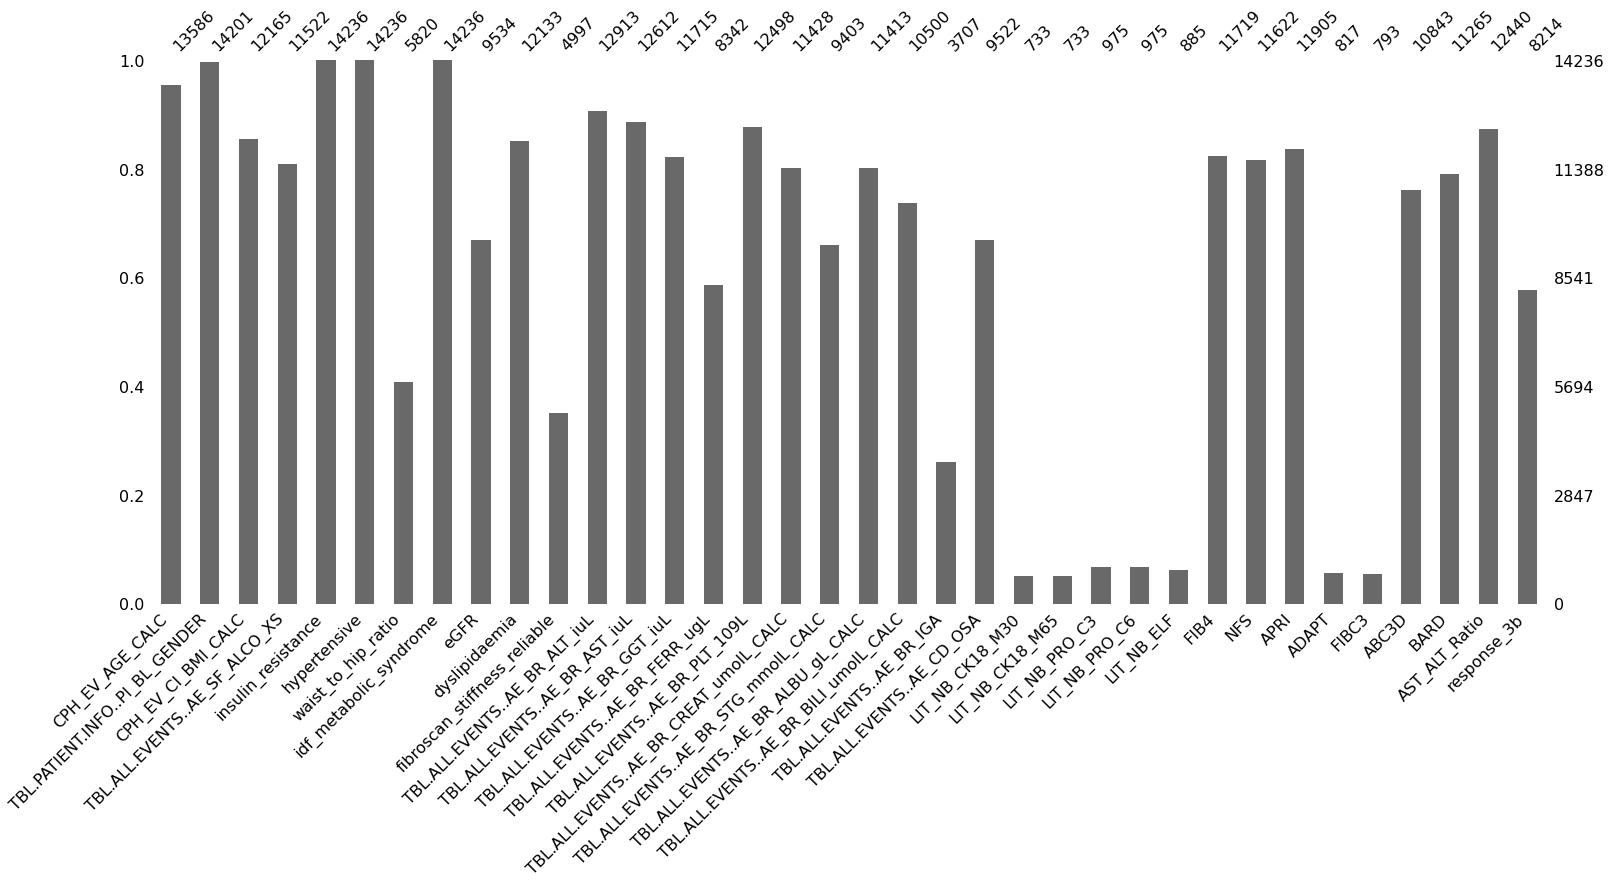

In [8]:
msno.bar(main_df)

In [4]:
# Convert required variables to boolean and normlaise the remaining variables
features_raw = main_df.iloc[:, 0:35]

# Loop to check for boolean columns
for column in features_raw:
  if features_raw[column].max() == 1 and features_raw[column].min() == 0:
    features_raw[column] = features_raw[column].astype(bool)

In [11]:
features_raw.dtypes

CPH_EV_AGE_CALC                           float64
TBL.PATIENT.INFO..PI_BL_GENDER               bool
CPH_EV_CI_BMI_CALC                        float64
TBL.ALL.EVENTS..AE_SF_ALCO_XS                bool
insulin_resistance                           bool
hypertensive                                 bool
waist_to_hip_ratio                        float64
idf_metabolic_syndrome                       bool
eGFR                                      float64
dyslipidaemia                                bool
fibroscan_stiffness_reliable              float64
TBL.ALL.EVENTS..AE_BR_ALT_iuL             float64
TBL.ALL.EVENTS..AE_BR_AST_iuL             float64
TBL.ALL.EVENTS..AE_BR_GGT_iuL             float64
TBL.ALL.EVENTS..AE_BR_FERR_ugL            float64
TBL.ALL.EVENTS..AE_BR_PLT_109L            float64
TBL.ALL.EVENTS..AE_BR_CREAT_umolL_CALC    float64
TBL.ALL.EVENTS..AE_BR_STG_mmolL_CALC      float64
TBL.ALL.EVENTS..AE_BR_ALBU_gL_CALC        float64
TBL.ALL.EVENTS..AE_BR_BILI_umolL_CALC     float64


In [5]:
# Filter to only select basline event types
features_raw['CPH_EV_EVENT_TYPE'] = df_raw['CPH_EV_EVENT_TYPE']
is_Baseline = features_raw['CPH_EV_EVENT_TYPE'] == 'Baseline'
features_baseline = features_raw[is_Baseline]
features_baseline = features_baseline.iloc[: , :-1]
features_baseline = features_baseline.reset_index()
features_baseline = features_baseline.iloc[: , 1:]

In [13]:
features_baseline

,CPH_EV_AGE_CALC,TBL.PATIENT.INFO..PI_BL_GENDER,CPH_EV_CI_BMI_CALC,TBL.ALL.EVENTS..AE_SF_ALCO_XS,insulin_resistance,hypertensive,waist_to_hip_ratio,idf_metabolic_syndrome,eGFR,dyslipidaemia,...,LIT_NB_PRO_C6,LIT_NB_ELF,FIB4,NFS,APRI,ADAPT,FIBC3,ABC3D,BARD,AST_ALT_Ratio
0,48.0,True,40.65,False,True,False,NaN,False,125.760131,False,...,NaN,NaN,0.781035,5.05210,0.260546,NaN,NaN,3.0,4.0,0.976744
1,48.0,False,24.96,False,True,True,0.937500,False,NaN,True,...,NaN,NaN,4.027894,3.57724,2.027027,NaN,NaN,3.0,1.0,0.622407
2,46.0,True,34.71,True,False,False,NaN,False,74.446292,False,...,NaN,NaN,0.818266,3.28974,0.183706,NaN,NaN,1.0,1.0,0.741935
3,46.0,False,40.44,True,False,False,NaN,True,94.341646,True,...,NaN,NaN,1.002893,3.82836,0.241935,NaN,NaN,1.0,1.0,0.729730
4,47.0,True,33.75,True,False,True,NaN,True,92.946937,True,...,NaN,NaN,0.641171,3.23650,0.184887,NaN,NaN,1.0,3.0,1.277778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9283,59.0,True,31.59,False,True,True,NaN,False,NaN,True,...,NaN,NaN,NaN,4.60746,NaN,NaN,NaN,4.0,NaN,NaN
9284,40.0,True,31.80,False,False,False,0.938596,False,NaN,True,...,NaN,NaN,NaN,2.79420,NaN,NaN,NaN,NaN,NaN,NaN
9285,60.0,True,30.70,False,False,False,NaN,True,196.357198,True,...,NaN,NaN,1.516690,3.43080,0.529514,NaN,NaN,2.0,3.0,1.150943
9286,60.0,True,33.31,False,True,True,NaN,True,NaN,True,...,NaN,NaN,NaN,4.80614,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# remove outliers
import numpy as np
from scipy import stats
cols_normalise = features_baseline.select_dtypes(include=[np.float64])

z_scores = stats.zscore(features_baseline[cols_normalise.columns],  nan_policy = 'omit')
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
features_filtered = features_baseline[cols_normalise.columns]

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

cols_normalise = features_baseline.select_dtypes(include=[np.float64])

# Normalise Data
scale = StandardScaler()
features_baseline[cols_normalise.columns] = scale.fit_transform(cols_normalise)

In [16]:
features_baseline

,CPH_EV_AGE_CALC,TBL.PATIENT.INFO..PI_BL_GENDER,CPH_EV_CI_BMI_CALC,TBL.ALL.EVENTS..AE_SF_ALCO_XS,insulin_resistance,hypertensive,waist_to_hip_ratio,idf_metabolic_syndrome,eGFR,dyslipidaemia,...,LIT_NB_PRO_C6,LIT_NB_ELF,FIB4,NFS,APRI,ADAPT,FIBC3,ABC3D,BARD,AST_ALT_Ratio
0,-0.241381,True,1.072286,False,True,False,NaN,False,1.565376,False,...,NaN,NaN,-0.908484,1.188859,-0.574596,NaN,NaN,0.433495,1.588542,0.427028
1,-0.241381,False,-1.320024,False,True,True,-0.446286,False,NaN,True,...,NaN,NaN,2.008688,-0.222085,3.343745,NaN,NaN,0.433495,-0.795633,-0.530100
2,-0.396861,True,0.166593,True,False,False,NaN,False,-0.625927,False,...,NaN,NaN,-0.875033,-0.497125,-0.745039,NaN,NaN,-0.873736,-0.795633,-0.207232
3,-0.396861,False,1.040266,True,False,False,NaN,True,0.223683,True,...,NaN,NaN,-0.709154,0.018152,-0.615877,NaN,NaN,-0.873736,-0.795633,-0.240201
4,-0.319121,True,0.020218,True,False,True,NaN,True,0.164123,True,...,NaN,NaN,-1.034146,-0.548058,-0.742419,NaN,NaN,-0.873736,0.793817,1.240172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9283,0.613764,True,-0.309124,False,True,True,NaN,False,NaN,True,...,NaN,NaN,NaN,0.763489,NaN,NaN,NaN,1.087111,NaN,NaN
9284,-0.863304,True,-0.277105,False,False,False,-0.434646,False,NaN,True,...,NaN,NaN,NaN,-0.971190,NaN,NaN,NaN,NaN,NaN,NaN
9285,0.691504,True,-0.444826,False,False,False,NaN,True,4.580148,True,...,NaN,NaN,-0.247528,-0.362179,0.022019,NaN,NaN,-0.220120,0.793817,0.897570
9286,0.691504,True,-0.046870,False,True,True,NaN,True,NaN,True,...,NaN,NaN,NaN,0.953558,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
from sklearn import preprocessing
names = list(features_baseline.columns)

x = features_baseline.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
features_baseline_scaled = min_max_scaler.fit_transform(x)
features_baseline_scaled = pd.DataFrame(features_baseline_scaled, columns=names)
features_baseline_scaled

,CPH_EV_AGE_CALC,TBL.PATIENT.INFO..PI_BL_GENDER,CPH_EV_CI_BMI_CALC,TBL.ALL.EVENTS..AE_SF_ALCO_XS,insulin_resistance,hypertensive,waist_to_hip_ratio,idf_metabolic_syndrome,eGFR,dyslipidaemia,...,LIT_NB_PRO_C6,LIT_NB_ELF,FIB4,NFS,APRI,ADAPT,FIBC3,ABC3D,BARD,AST_ALT_Ratio
0,0.483871,1.0,0.688333,0.0,1.0,0.0,NaN,0.0,0.372273,0.0,...,NaN,NaN,0.046102,0.712414,0.020094,NaN,NaN,0.500000,1.00,0.155070
1,0.483871,0.0,0.165333,0.0,1.0,1.0,0.228253,0.0,NaN,1.0,...,NaN,NaN,0.299008,0.445626,0.193066,NaN,NaN,0.500000,0.25,0.094718
2,0.451613,1.0,0.490333,1.0,0.0,0.0,NaN,0.0,0.206149,0.0,...,NaN,NaN,0.049002,0.393620,0.012570,NaN,NaN,0.166667,0.25,0.115076
3,0.451613,0.0,0.681333,1.0,0.0,0.0,NaN,1.0,0.270558,1.0,...,NaN,NaN,0.063383,0.491051,0.018272,NaN,NaN,0.166667,0.25,0.112998
4,0.467742,1.0,0.458333,1.0,0.0,1.0,NaN,1.0,0.266043,1.0,...,NaN,NaN,0.035208,0.383990,0.012686,NaN,NaN,0.166667,0.75,0.206343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9283,0.661290,1.0,0.386333,0.0,1.0,1.0,NaN,0.0,NaN,1.0,...,NaN,NaN,NaN,0.631983,NaN,NaN,NaN,0.666667,NaN,NaN
9284,0.354839,1.0,0.393333,0.0,0.0,0.0,0.229013,0.0,NaN,1.0,...,NaN,NaN,NaN,0.303982,NaN,NaN,NaN,NaN,NaN,NaN
9285,0.677419,1.0,0.356667,0.0,0.0,0.0,NaN,1.0,0.600826,1.0,...,NaN,NaN,0.103404,0.419137,0.046431,NaN,NaN,0.333333,0.75,0.184740
9286,0.677419,1.0,0.443667,0.0,1.0,1.0,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,0.667922,NaN,NaN,NaN,NaN,NaN,NaN


## Data Imputation Strategies

In [13]:
# Imports for imputation functions
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression

In [7]:
# Single imputation with mean to replace not a number (NaNs)
def nan2mean(fdf):
    cols = list(fdf.columns)
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    fdf=imp.fit_transform(fdf)
    fdf = pd.DataFrame(fdf, columns=cols)
    return fdf

In [8]:
# Single imputation with median to replace not a number (NaNs)
def nan2median(fdf):
    cols = list(fdf.columns)
    imp = SimpleImputer(missing_values=np.nan, strategy='median')
    fdf=imp.fit_transform(fdf)
    fdf = pd.DataFrame(fdf, columns=cols)
    return fdf

In [9]:
# Single imputation with most_frequent to replace not a number (NaNs)
def nan2most_frequent(fdf):
    cols = list(fdf.columns)
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    fdf=imp.fit_transform(fdf)
    fdf = pd.DataFrame(fdf, columns=cols)
    return fdf

In [10]:
# Multiple Imputation by chained equation linear regression
def nan2mice(fdf):
    cols = list(fdf.columns)
    lr = LinearRegression()
    imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=50, imputation_order='roman',random_state=0)
    fdf=imp.fit_transform(fdf)
    fdf = pd.DataFrame(fdf, columns=cols)
    return fdf

In [11]:
# Imputation by K neasrest neighbours
def nan2knn(fdf):
    cols = list(fdf.columns)
    imp = KNNImputer(n_neighbors=2, weights="distance")
    fdf=imp.fit_transform(fdf)
    fdf = pd.DataFrame(fdf, columns=cols)
    return fdf

## Model evaluation

In [14]:
# Create new imputed datasets
featuresKNN = nan2knn(features_baseline)
featuresMean = nan2mean(features_baseline)
featuresMedian = nan2median(features_baseline)
featuresMICE = nan2mice(features_baseline)
featuresMostFrq = nan2most_frequent(features_baseline)
featuresMostFrq = featuresMostFrq.apply(pd.to_numeric)

# Create list of all imputation strategies
imputed_features = [featuresKNN,featuresMean,featuresMedian,featuresMICE,featuresMostFrq]
imputed_features_names = ['featuresKNN','featuresMean','featuresMedian','featuresMICE','featuresMostFrq']

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


Text(0.5, 0, 'CPH_EV_AGE_CALC')

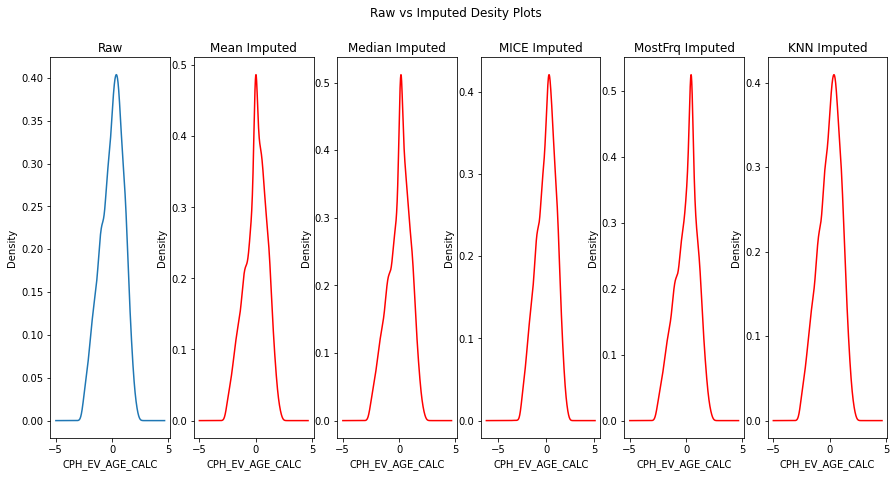

In [15]:
column_name = "CPH_EV_AGE_CALC"

d = {'raw': features_baseline[column_name], 
     'KNN Imputation': featuresKNN[column_name],
     'Mean Imputation': featuresMean[column_name],
     'Median Imputation': featuresMedian[column_name],
     'MICE Imputation': featuresMICE[column_name],
     'MostFrq Imputation': featuresMostFrq[column_name]}
fdata = pd.DataFrame(data=d)

# calling density() to make multiple density plot 
fig, axes = plt.subplots(1, 6)
fig.suptitle('Raw vs Imputed Desity Plots')
fdata['raw'].plot.density(ax=axes[0], figsize = (15, 7))
fdata['Mean Imputation'].plot.density(ax=axes[1], figsize = (15, 7), color='red')
fdata['Median Imputation'].plot.density(ax=axes[2], figsize = (15, 7), color='red')
fdata['MICE Imputation'].plot.density(ax=axes[3], figsize = (15, 7), color='red')
fdata['MostFrq Imputation'].plot.density(ax=axes[4], figsize = (15, 7), color='red')
fdata['KNN Imputation'].plot.density(ax=axes[5], figsize = (15, 7), color='red')

axes[0].set_title('Raw')
axes[1].set_title('Mean Imputed')
axes[2].set_title('Median Imputed')
axes[3].set_title('MICE Imputed')
axes[4].set_title('MostFrq Imputed')
axes[5].set_title('KNN Imputed')

axes[0].set_xlabel(column_name)
axes[1].set_xlabel(column_name)
axes[2].set_xlabel(column_name)
axes[3].set_xlabel(column_name)
axes[4].set_xlabel(column_name)
axes[5].set_xlabel(column_name)

In [16]:
# Pull response from data frame with only baseline observations
y = main_df["response_3b"]
response = pd.DataFrame({'y':y, 'Baseline':df_raw['CPH_EV_EVENT_TYPE']})
is_Baseline = response['Baseline'] == 'Baseline'
response = response[is_Baseline]
response = response['y']

# Add response variable to all imputed datasets and remove observations with NaN responses
for i in range(len(imputed_features)):
  df = imputed_features[i]
  df['response'] = response
  df = df.dropna(inplace=True)

# Feature Selection

In [ ]:
pip install featurewiz

In [ ]:
# automatic feature selection by using featurewiz package
from featurewiz import featurewiz
target = 'response'

features_selected, train = featurewiz(featuresKNN, target, corr_limit=0.7, verbose=2, sep=",", header=0,test_data="", feature_engg="", category_encoders="")

In [ ]:
from sklearn.model_selection import train_test_split

# function to generate test/train split
def train_test (fdf):
  # Split data into test and trian
  X_train, X_test, y_train, y_test = train_test_split(fdf.iloc[:, 0:35], fdf.iloc[: , -1], test_size=0.30, random_state=0)
  return X_train, X_test, y_train, y_test

In [ ]:
# Filter all data frames based upon best features
featuresKNN = featuresKNN[features_selected]
featuresMean = featuresMean[features_selected]
featuresMedian = featuresMedian[features_selected]
featuresMICE = featuresMICE[features_selected]
featuresMostFrq = featuresMostFrq[features_selected]

imputed_features = [featuresKNN,featuresMean,featuresMedian,featuresMICE,featuresMostFrq]

# Add response variable to all imputed datasets
for i in range(len(imputed_features)):
  df = imputed_features[i]
  df['response'] = response

In [ ]:
featuresKNN

# SMOTE

In [17]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.1


In [23]:
import collections
# summarize class distribution
counter = collections.Counter(featuresMICE['response'])
print(counter)

Counter({1.0: 3519, 0.0: 1312})


In [ ]:
# transform the dataset
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

for df in imputed_features:
  X = df.iloc[:, 0:35] 
  y = df.iloc[: , -1]

In [32]:
# summarize the new class distribution
counter = collections.Counter(y)
print(counter)

Counter({1.0: 3519, 0.0: 3519})


### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

# Logistic Regression model
# Implement the model
logreg = LogisticRegression()

# hyperparameters, penalty values chosen to work with all solvers
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

# SMOTE
over = SMOTE(sampling_strategy=0.7)
under = RandomUnderSampler(sampling_strategy=0.9)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

for i in range(len(imputed_features)):
  df = imputed_features[i]
  X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:35], df['response'], test_size=0.33, random_state=42)
  
  X_train, y_train = pipeline.fit_resample(X_train, y_train)

  grid_result = grid_search.fit(X_train, y_train)
  grid_predict = grid_result.predict(X_test)

  # summarize results
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_), imputed_features_names[i])
  print(confusion_matrix(y_test, grid_predict))
  print(classification_report(y_test, grid_predict))

Best: 0.552074 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'} featuresKNN
[[129 302]
 [317 847]]
              precision    recall  f1-score   support

         0.0       0.29      0.30      0.29       431
         1.0       0.74      0.73      0.73      1164

    accuracy                           0.61      1595
   macro avg       0.51      0.51      0.51      1595
weighted avg       0.62      0.61      0.61      1595

Best: 0.542108 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'} featuresMean
[[156 275]
 [400 764]]
              precision    recall  f1-score   support

         0.0       0.28      0.36      0.32       431
         1.0       0.74      0.66      0.69      1164

    accuracy                           0.58      1595
   macro avg       0.51      0.51      0.50      1595
weighted avg       0.61      0.58      0.59      1595

Best: 0.561078 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'} featuresMedian
[[141 290]
 [352 812]]
              preci

### SVM

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



### XGBoost 

In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
X_train, X_test, y_train, y_test = train_test_split(featuresMICE.iloc[:, 0:35], featuresMICE['response'], test_size=0.33, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7203761755485893


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def model_RF(fdf, response):
  # Pull the correct resposne variable from the dataframe
  y = main_df[response]
  # Remove all rows with missing observations
  X = fdf
  X['y'] = y
  X = fdf.dropna()
  # Split data into test and trian
  X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, 0:35], X.iloc[: , -1], test_size=0.20, random_state=0)
  # Implement the model
  regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)

  #use model to predict probability that given y value is 1
  y_pred_proba = regressor.predict_proba(X_test)[::,1]

  #calculate AUC of model
  auc = metrics.roc_auc_score(y_test, y_pred_proba)

  #print AUC score
  print(auc)

  # Calculate F-score
  report = classification_report(y_test, y_pred)
  print(report)

  return y_pred

## Model Imports

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Pipeline

## Imputation and Target Variable Selection

In [ ]:
compare_denisty("CPH_EV_AGE_CALC",featuresKNN)

# New workflow

## Split

In [171]:
# Filter to only select basline event types
main_df['CPH_EV_EVENT_TYPE'] = df_raw['CPH_EV_EVENT_TYPE']
main_df_base = main_df[main_df['CPH_EV_EVENT_TYPE'] == 'Baseline']
main_df_base = main_df_base.iloc[: , :-1]

In [172]:
# Loop to check for boolean columns
for column in main_df_base:
  if main_df_base[column].max() == 1 and main_df_base[column].min() == 0:
    main_df_base[column] = main_df_base[column].astype(bool)

In [ ]:
main_df_base.dtypes

In [173]:
X_train, X_test, y_train, y_test = train_test_split(main_df_base.iloc[:, 0:35], main_df_base['response_3a'], test_size=0.33, random_state=42)

## Imputing

In [ ]:
X_train_imputed = nan2mice(X_train)
X_test_imputed = nan2mice(X_test)

## Scaling 

In [181]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

to_scale_train = X_train_imputed.select_dtypes(include=[np.float64])
to_scale_test = X_train_imputed.select_dtypes(include=[np.float64])

# standardization of dependent variables
X_train_imputed_scaled = rs.fit_transform(to_scale_train)
X_test_imputed_scaled = rs.fit_transform(to_scale_test)

In [182]:
x_df_train = pd.DataFrame(X_train_imputed_scaled)
x_df_train[35] = y_train
x_df_train.dropna(inplace=True)

x_df_test = pd.DataFrame(X_test_imputed_scaled)
x_df_test[35] = y_test
x_df_test.dropna(inplace=True)

## Model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(x_df_train.iloc[:, 0:35], x_df_train[35])
y_pred = model.predict(x_df_test.iloc[:, 0:35])
y_pred = y_pred.astype(bool)
print(confusion_matrix(x_df_test[35].astype(bool), y_pred))
print(classification_report(x_df_test[35].astype(bool), y_pred))

NameError: ignored